In [21]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets


## 1. Load the Data


In [22]:

#1. Read Housing.csv file from the folder
California = pd.read_csv('datasets/Project_dataset/housing.csv')

#2. Print First few rows of data
California.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [23]:
California.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [24]:
#3. Extract input(X)  and output(Y) datafrom the dataset
X = California.drop('median_house_value', axis=1).values
Y = California['median_house_value'].values




In [25]:
print(Y)

[452600 358500 352100 ...  92300  84700  89400]


## 2. Handle Missing Values

In [26]:
#Fill Missing Values with "Mean" of the respective column
#find rows or colums with Nan values
pd.isnull(California).sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [27]:
#Analyse rows with nan
nan_rows = California[California.isnull().T.any().T]
nan_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


In [28]:
#Fill Missing Values with "Mean" of the respective column
California_Missing_values_with_mean= California.fillna(California.mean())

California_Missing_values_with_mean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [29]:
#check if all missing values handled
pd.isnull(California_Missing_values_with_mean).sum()
nan_rows = California_Missing_values_with_mean[California_Missing_values_with_mean.isnull().T.any().T]
nan_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


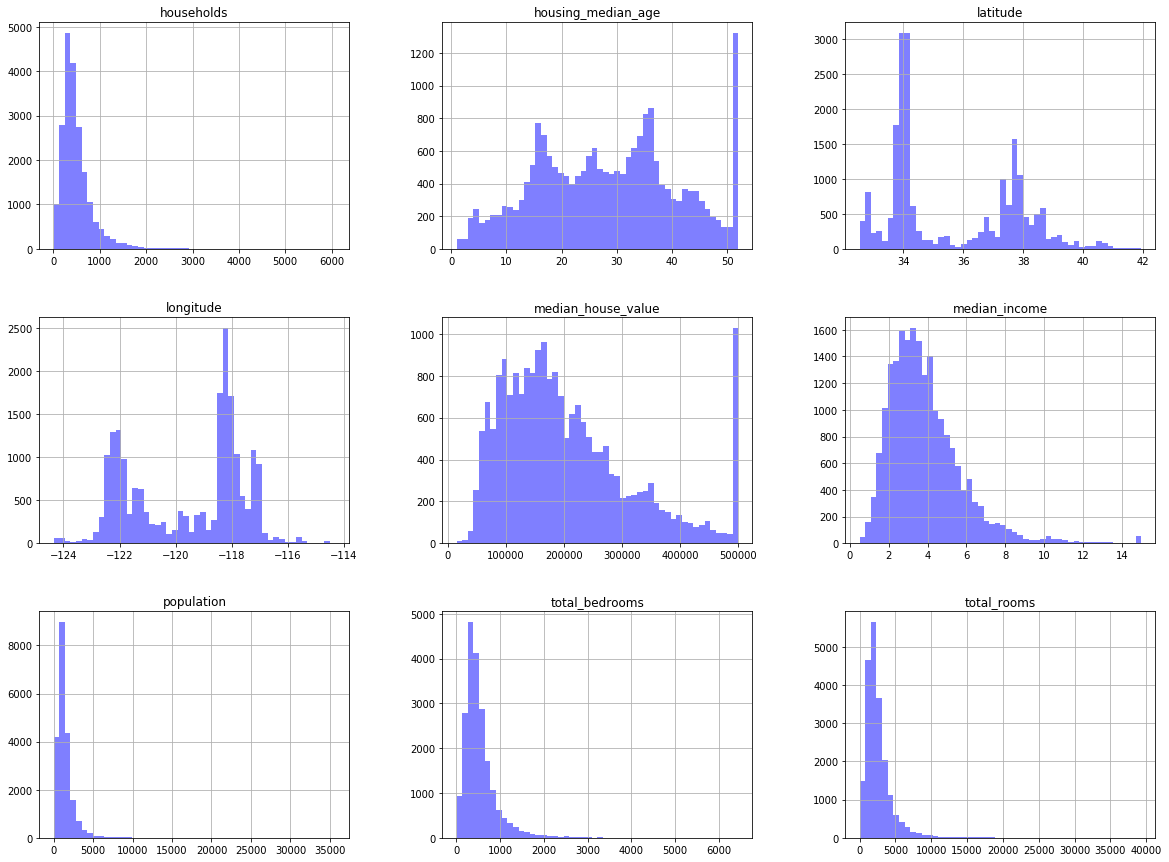

In [30]:

%matplotlib inline 
import matplotlib.pyplot as plt
California_Missing_values_with_mean.hist(bins=50, figsize=(20,15),alpha=0.5,color='blue')
plt.show()

## 3. Encode Ctegorical Data

In [31]:
#Distinct values of ocean_proximity column
California_Missing_values_with_mean.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
# create dummy variables using get_dummies, then exclude the first dummy column
California_dummies = pd.get_dummies(California_Missing_values_with_mean.ocean_proximity, prefix='ocean_proximity').iloc[:, 1:]

In [35]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
California_data = pd.concat([California_Missing_values_with_mean, California_dummies], axis=1)
California_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,1,0


In [36]:
check_Encoded_Categorical_Df=California_data
df = check_Encoded_Categorical_Df.drop_duplicates('ocean_proximity')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,1,0
701,-121.97,37.64,32,1283,194.0,485,171,6.0574,<1H OCEAN,431000,0,0,0,0
954,-121.92,37.64,46,1280,209.0,512,208,5.1406,INLAND,315600,1,0,0,0
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,NEAR OCEAN,109400,0,0,0,1
8314,-118.32,33.35,27,1675,521.0,744,331,2.1579,ISLAND,450000,0,1,0,0


## Correlation 

In [81]:
#california_corr=California_Missing_values_with_mean.corr()
#california_corr['median_house_value'].sort_values(ascending=False)
california_corr=California_data.corr()
california_corr['median_house_value'].sort_values(ascending=False)


median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [ ]:
#on the basis of above correlation results, 
#the 'households' ,total_bedrooms,ocean_proximity_ISLAND,'population', longitude 
#are less corelated with median_house_value 

# 4. Split the Data

In [129]:
#Prepare X and Y

#feature_cols=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households'
#              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

feature_cols=['longitude','housing_median_age','total_rooms','total_bedrooms','population','households'
              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

#feature_cols=['latitude','housing_median_age','total_rooms','median_income','ocean_proximity_INLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']
x = California_data[feature_cols]
y = California_data.median_house_value

In [130]:

#Split the data into 80% training  dataset and 20% test dataset

# Import necessary modules
from sklearn.model_selection import train_test_split


# Create training and test set
x_train, x_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print (x_train.shape, Y_train.shape)
print (x_test.shape, Y_test.shape)

(16512, 11) (16512,)
(4128, 11) (4128,)


 # 5. Standardizing

In [131]:
#Standardizing X_train and X_test
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


 

## 6. Perform Linear Regression

In [132]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(x_train,Y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test)

# Compute and print R^2 and RMSE
print("R^2 for traning data: {}".format(reg_all.score(x_train,Y_train)))
#print("R^2 for testing data: {}".format(reg_all.score(x_test, Y_test)))
print("R^2 for testing data: {}".format(r2_score(Y_test,y_pred)))
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2 for traning data: 0.6385162813826918
R^2 for testing data: 0.615668886836324
Root Mean Squared Error: 70966.96001006386


## 7. Perform Decision Tree Regression

In [133]:
#feature_cols=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households'
#              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

feature_cols=['longitude','housing_median_age','total_rooms','total_bedrooms','population','households'
              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

#feature_cols=['latitude','housing_median_age','total_rooms','median_income','ocean_proximity_INLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

x_DTR = California_data[feature_cols]
y_DTR = California_data.median_house_value

#Split the data into 80% training  dataset and 20% test dataset

# Import necessary modules
from sklearn.model_selection import train_test_split


# Create training and test set
x_DTR_train, x_DTR_test, Y_DTR_train, Y_DTR_test = train_test_split(x_DTR,y_DTR,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeRegressor
model_DTR= DecisionTreeRegressor(random_state = 48)
model_DTR.fit(x_DTR_train,Y_DTR_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=48, splitter='best')

In [134]:
# Predict on the test data: y_pred
y_DTR_pred = model_DTR.predict(x_DTR_test)

# Compute and print R^2 and RMSE

from sklearn.metrics import r2_score,mean_squared_error

print("R^2 for traning data: {}".format(model_DTR.score(x_DTR_train,Y_DTR_train)))
#print("R^2 for testing data: {}".format(reg_all.score(x_test, Y_test)))
print("R^2 for testing data: {}".format(r2_score(Y_DTR_test,y_DTR_pred)))
rmse = np.sqrt(mean_squared_error(Y_DTR_test,y_DTR_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 for traning data: 1.0
R^2 for testing data: 0.5375808148340875
Root Mean Squared Error: 77843.3203269396


## 8. Perform Random forest

In [135]:
#feature_cols=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households'
#              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']
        
feature_cols=['longitude','housing_median_age','total_rooms','total_bedrooms','population','households'
              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

#feature_cols=['longitude','housing_median_age','total_rooms','total_bedrooms','population','households'
#              ,'median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

#feature_cols=['latitude','housing_median_age','total_rooms','median_income','ocean_proximity_INLAND'
#              ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

x_RF = California_data[feature_cols]
y_RF = California_data.median_house_value

#Split the data into 80% training  dataset and 20% test dataset

# Import necessary modules
from sklearn.model_selection import train_test_split


# Create training and test set
x_RF_train, x_RF_test, Y_RF_train, Y_RF_test = train_test_split(x_RF,y_RF,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(random_state = 48)
model_RF.fit(x_RF_train,Y_RF_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=48, verbose=0, warm_start=False)

In [136]:
# Predict on the test data: y_pred
y_RF_pred = model_RF.predict(x_RF_test)

# Compute and print R^2 and RMSE

from sklearn.metrics import r2_score,mean_squared_error

print("R^2 for traning data: {}".format(model_RF.score(x_RF_train,Y_RF_train)))
#print("R^2 for testing data: {}".format(reg_all.score(x_test, Y_test)))
print("R^2 for testing data: {}".format(r2_score(Y_RF_test,y_RF_pred)))
rmse = np.sqrt(mean_squared_error(Y_RF_test,y_RF_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 for traning data: 0.9551782261502803
R^2 for testing data: 0.7384746008843336
Root Mean Squared Error: 58541.03099871098


## 9. Perform Linear Regression with one independent variable

In [101]:
# Separate the single feature from dataset and label from dataset
X_mIncome = California_data.median_income.values.reshape(-1,1)
y_mHouseValue = California_data.median_house_value.values.reshape(-1,1)
 
# Split into training set and test set
from sklearn.model_selection import train_test_split as tts
X_mIncome_train,X_mIncome_test,y_mHouseValue_train,y_mHouseValue_test = tts(X_mIncome,y_mHouseValue,test_size=0.2,random_state=33)

# Perform Scaling
from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
X_mIncome_train = sc.fit_transform(X_mIncome_train)
X_mIncome_test = sc.fit_transform(X_mIncome_test)
y_mHouseValue_train = sc.fit_transform(y_mHouseValue_train).ravel()
y_mHouseValue_test = sc.fit_transform(y_mHouseValue_test).ravel()

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [102]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_mIncome_train,y_mHouseValue_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
# Perform prediction and model score
y_mHouseValue_pred = model_linear.predict(X_mIncome_test)
from sklearn.metrics import r2_score
r2_score(y_mHouseValue_test,y_mHouseValue_pred)

0.497807563047161

No handles with labels found to put in legend.


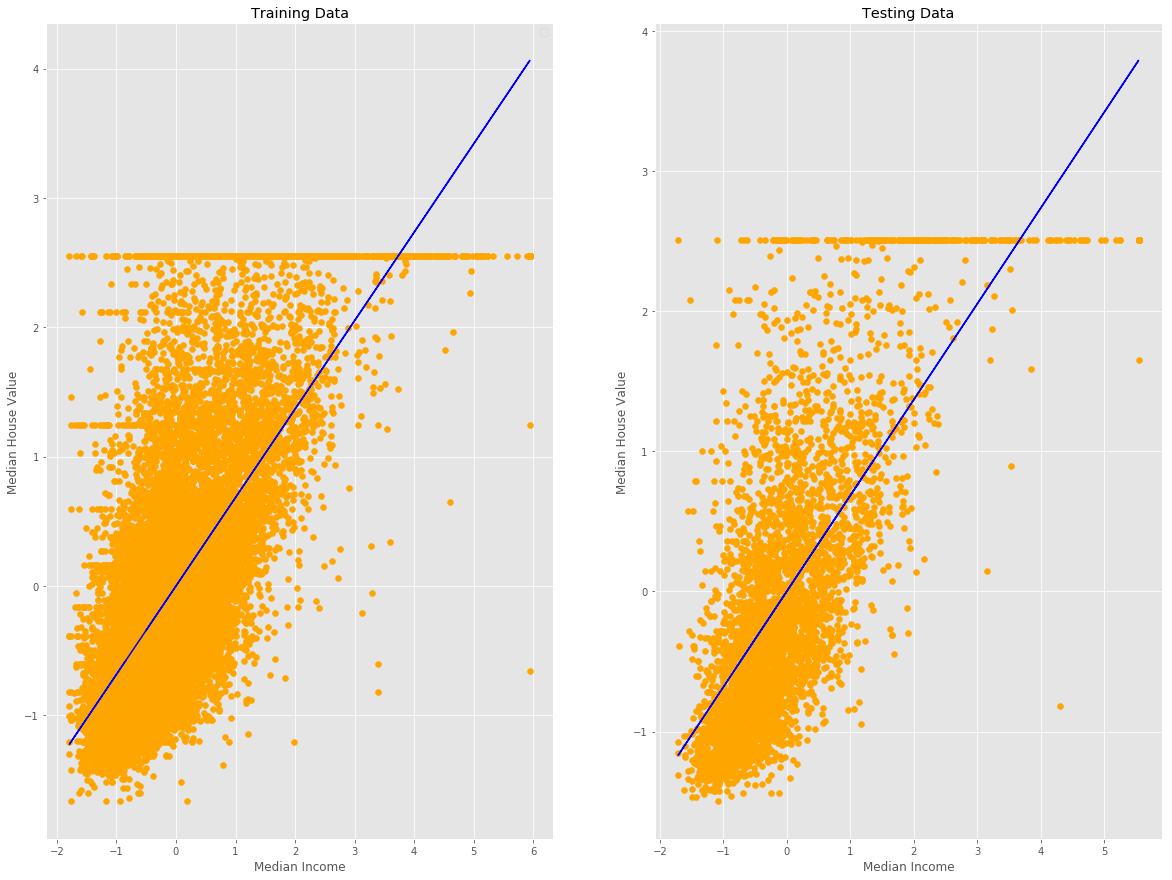

In [104]:
# plot the graph for Training set and Testing set and see the visualization of the dataset
plt.style.use("ggplot")
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_mIncome_train,y_mHouseValue_train,color="orange")
plt.plot(X_mIncome_train,model_linear.predict(X_mIncome_train),color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_mIncome_test,y_mHouseValue_test,color="orange")
plt.plot(X_mIncome_test,y_mHouseValue_pred,color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()